# Module

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%autoreload 2
# try:
#   # tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass    x = self.conv(inputs)
#     #     for layer in [
#     #         self.bn,
#     #         self.activation
#     #     ]:
#     #         x = layer(x)
    #     return x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
# from src.cv.Model import model_builder_dict
# from src.cv.Model.ResNet import ResNet
from src.Model.ResNet50 import ResNet50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# ! pip install matplotlib

# Config 

In [4]:
debug = True
debug_data_length = 10
model_builder_key = "cnn_model"
label_num = 10
res_block_num = 3
conv_filter_num = 64
channel_num = 3
if debug:
    batch_size = 2
    train_epoches = 10
else:
    train_epoches = 30
model_dir = "../models"
# else:
#     batch

In [5]:
# !mkdir {model_dir}

# Data

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
if debug:
    train_images = train_images[:debug_data_length, :, :]
    train_labels = train_labels[:debug_data_length, :]
    test_images = test_images[:debug_data_length, :, :]
    test_labels = test_labels[:debug_data_length, :]

170500096/170498071 [==============================] - 112s 1us/step


In [10]:
train_images.shape

(10, 32, 32, 3)

In [11]:
train_images[:debug_data_length, :, :].shape

(10, 32, 32, 3)

In [12]:
train_labels.shape

(10, 1)

## Input_fn 

In [13]:
def input_fn(X, y, batch_size, epoch=1):
#     def fun():
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.repeat(epoch).batch(batch_size=batch_size)    

## Dataset 

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

In [15]:
a = dataset.take(1)

In [16]:
train_images.shape

(10, 32, 32, 3)

In [17]:
a = train_images.reshape((10, 1, 32, 32, 3))

In [18]:
a.shape

(10, 1, 32, 32, 3)

In [19]:
train_images.shape

(10, 32, 32, 3)

In [20]:
# a.numpy

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


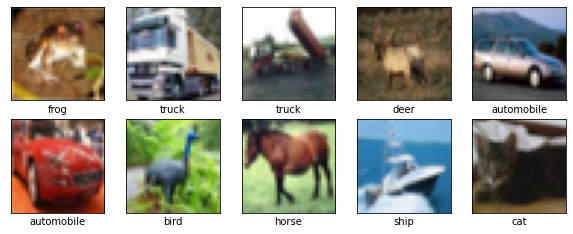

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(debug_data_length):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Dataset 

In [22]:
train_images.shape

(10, 32, 32, 3)

In [23]:
datasets = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).repeat(train_epoches).batch(batch_size=batch_size)

In [24]:
datasets

<BatchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.uint8)>

# Model

In [1]:
# model = model_builder_dict[model_builder_key]().build_model()

# model = ResNet(
#     label_num=label_num,
#     res_block_num=res_block_num,
#     conv_filter_num=conv_filter_num,
#     channel_num=channel_num
# )
model = ResNet50(
    class_num=label_num
)
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metircs=["accuracy"]
)

NameError: name 'ResNet50' is not defined

Let's display the architecture of our model so far.

In [ ]:
model.fit(
    datasets
)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [23]:
# model.save("model")

# Save model

In [24]:
train_images[0].shap

(32, 32, 3)

In [25]:
train_images.shape

(10, 32, 32, 3)

In [26]:
x, y, z,a = train_images.shape

In [30]:
train_labels.shape

(10, 1)

In [31]:
train_labels

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [27]:

history = model.fit(
                    
#                     x=lambda: input_fn(train_images, train_labels, batch_size, epoch=epoch)
                    x=tf.data.Dataset.from_tensor_slices((train_images.reshape((x, 1, y, z, a)), train_labels)),
#                     x=train_images,
#                     y=train_labels,
#                     epochs=train_epochs, 
#                     validation_data=(test_images, test_labels)
                   )


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 [==============================] - 1s 108ms/step - loss: 3.0714 - accuracy: 0.0000e+00


In [ ]:
model.save(model_dir)

In [30]:
model.summary()

Model: "cnn_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  896       
_________________________________________________________________
batch_normalization_2 (Batch multiple                  128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                  36928     
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0     

# Eval

In [14]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

KeyError: 'acc'